In [3]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [5]:
data = pd.read_csv('C:/Users/yayat/OneDrive/Documentos/Jeimmy/Universidad/NPL/Taller 7/reviews_vidjew_es.csv')
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [7]:
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [8]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [9]:
print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


In [10]:
stopwords_sp = stopwords.words('spanish')

In [11]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

In [12]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [15]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

In [16]:
X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

In [17]:
print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (800, 3221)
Tamaño de X_test (prueba): (200, 3221)
Tamaño de y_train 800 y tamaño de y_test 200


In [18]:
logreg = LogisticRegression(class_weight='balanced')

In [19]:
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [20]:
y_pred_logreg = logreg.predict(X_test)

In [21]:
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")

Regresión Logística:    0.86


In [24]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='jewelry'):.2f}")
    print()

precision_score
Regresión Logística: 0.86

recall_score
Regresión Logística: 0.86

f1_score
Regresión Logística: 0.86



In [25]:
print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()



Regresión Logística
              precision    recall  f1-score   support

     jewelry       0.86      0.86      0.86        97
 video_games       0.86      0.86      0.86       103

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200




In [27]:
confusion_matrix(y_test, y_pred_logreg)

array([[83, 14],
       [14, 89]], dtype=int64)

Text(0.5, 1.0, 'Regresión Logística')

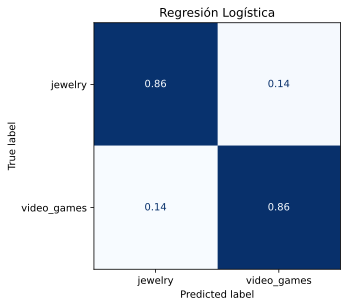

In [28]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(10,10))

ax2 = fig.add_subplot(2,2,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2, normalize='true').im_.colorbar.remove()
plt.title("Regresión Logística")


In [30]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}

In [31]:
# Las palabras que contribuyen a la clase 0
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][:10]

[('calidad', -1.96),
 ('foto', -1.94),
 ('pulsera', -1.87),
 ('bonito', -1.85),
 ('bonitos', -1.84),
 ('bonita', -1.55),
 ('plata', -1.53),
 ('cadena', -1.43),
 ('pequeño', -1.2),
 ('cierre', -1.16)]

In [32]:
# Las palabras que contribuyen a la clase 1
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][-10:]

[('cable', 0.99),
 ('botones', 1.01),
 ('consola', 1.13),
 ('hijo', 1.18),
 ('funciona', 1.2),
 ('ps', 1.26),
 ('jugar', 1.36),
 ('perfecto', 1.36),
 ('mando', 1.94),
 ('juego', 3.61)]

In [ ]:
# Interpretación del modelo: Del modelo se puede decir que es bastante acertado en la manera como predijo las palabras de cada clase